In [ ]:
#here  target variable is class  and  it represents whether person has cancer or not, we want to build simple two layer
#neural network, that based on given columns , classifies  existence of cancer, image is given below

import pandas as pd
import numpy as np
data =pd.read_csv("breast_cancer_bd.csv")
#replace  all  ?  with nan
data =data.replace('?',np.nan)  #convert all ? to nan

#convert all  string to number
data['Bare Nuclei'] =pd.to_numeric(data['Bare Nuclei'] )
#replace nan with  mean
data['Bare Nuclei'] =round(data['Bare Nuclei'].fillna(data['Bare Nuclei'].mean()),2)

#let us seperate  dependent and independent variable  and  divide into training and  test part
y =data['Class'].values
X =data.drop('Class',axis=1).values
#let us divide data into training and test part
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)
#new let us  transform data into scaled version using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


#let us build neural network, that consist of two layer given  on image and on each layer we have  in total 4 node, it is something like
# a graph , but it requires some mathematical equation like this : y=k1*x1+k2*x2+.....kn*xn+b  and  we also apply so called activation function
#that transforms  result into meaningful form , for example  relu function is defined as relu(z) =max(0,z) so all negatives became 0 and
#all positive will be unchanged and function sigmoid to return probability

from keras.models import Sequential  #it means that  that are  transfered sequntial
from keras.layers import Dense  #it means that all nodes are connected to all node

model =Sequential()  #create a class object
model.add(Dense(units=4,activation='relu',input_dim =X_train.shape[1]))
#units  =nodes, activation is transformation function and input_dim  asking us to tell neural network how many
#columns are connected,X_train.shape=(559, 9) and  we have  tuple with  at index 1 number of column=9
model.add(Dense(units=4,activation='relu'))  #just add another layer without input_dim
model.add(Dense(units=1,activation='sigmoid'))  #output layer with  probability of having cancer
#let us add compile for neural network -how  model should be updated
model.compile(
    optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy']
)
#optimizer is mathematical way of updating weights,  loss is that should be minimzed and accuracy is that
#should be maximized
model.fit(X_train,y_train,batch_size=50,epochs=30,validation_data=(X_test,y_test),verbose=1)
#batch_size=50 means that each time 559/50=11.8 data goes for loss calculation and epochs means cycles


data.head()

In [30]:
#let us estimate  model's result for new data
probability =model.predict(scaler.transform([[3,2,1,3,2,2,2,2,2]]))
if probability[0][0]>0.5:
  print('cancer exist')
else:
  print('not cancer')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
not cancer


In [19]:
[[5]]

In [20]:
X_train.shape

(559, 9)

In [ ]:
#first of all let us check types of data
data.info()

In [22]:
#let us check  what are the values of   Bare Nuclei   column
data['Bare Nuclei'].unique()
# we have  here question marks and also  strings, let us convert  string to numeric and also replace ?

array([ 1.  , 10.  ,  2.  ,  4.  ,  3.  ,  9.  ,  7.  ,  3.54,  5.  ,
        8.  ,  6.  ])

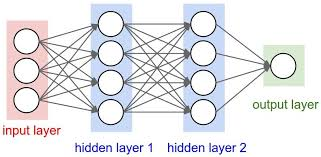